In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data =  pd.read_csv("C:/Users/shivani/Downloads/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = data.drop("Outcome", axis = 1)
y = data["Outcome"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.2)

In [7]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# store the predictions
y_pred=logreg.predict(X_test)

In [8]:
#Model evaluation using confusion matrix
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
cf_matrix

array([[84, 17],
       [26, 27]], dtype=int64)

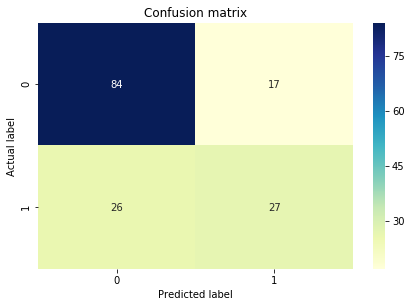

In [9]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [10]:
#Evaluation of model using model evaluation metrics - accuracy, precision and recall
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7207792207792207
Precision: 0.6136363636363636
Recall: 0.5094339622641509


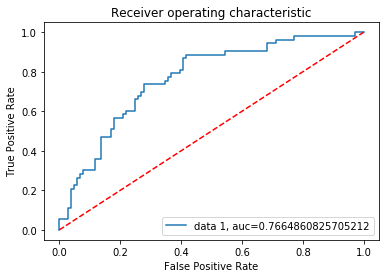

In [11]:
#ROC Curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [12]:
#RFE
from sklearn.feature_selection import RFE

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X_train, y_train)
print("Num Features: ", fit.n_features_)
print("Selected Features: ",  fit.support_)
print("Feature Ranking: ", fit.ranking_)

Num Features:  5
Selected Features:  [ True  True  True False False  True  True False]
Feature Ranking:  [1 1 1 4 3 1 1 2]


In [13]:
X_train_f = X_train[["Pregnancies", "Glucose", "BloodPressure", "BMI", "DiabetesPedigreeFunction"]]
X_test_f  = X_test[["Pregnancies", "Glucose", "BloodPressure", "BMI", "DiabetesPedigreeFunction"]]

# store the predictions
logreg.fit(X_train_f,y_train)

# store the predictions
y_pred=logreg.predict(X_test_f)

In [14]:
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
cf_matrix

array([[86, 15],
       [27, 26]], dtype=int64)

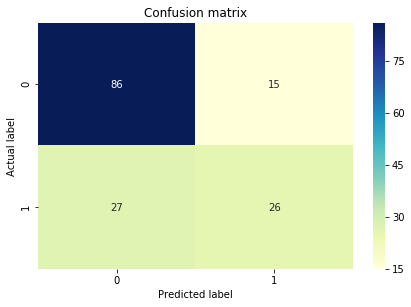

In [15]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7272727272727273
Precision: 0.6341463414634146
Recall: 0.49056603773584906


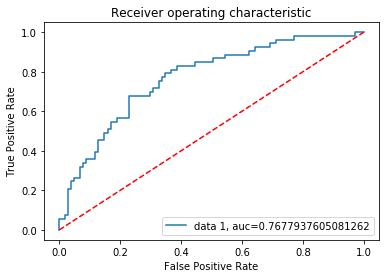

In [17]:
y_pred_proba = logreg.predict_proba(X_test_f)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [18]:
#AUC score for the case is 0.767

In [19]:
#Grid SearchCV
#->Looking at the misclassified instances,we can observe that 27 Diabetes cases have been classified incorrectly as 
#Non-Diabetes (False Negatives)
#->A False Negative is more serious as a disease has been ignored.
#->Using Grid Search, the False Negatives are tried to be minimized in order to find optimal parameters.
#->Grid Search can be used to improve any specific evaluation metric, here the metric we need to focus on to reduce False 
#Negatives is Recall. 

In [20]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf.fit(X_train, y_train)

#Predict values based on new parameters
y_pred = grid_clf.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(metrics.accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(metrics.precision_score(y_test,y_pred)))
print('Recall Score : ' + str(metrics.recall_score(y_test,y_pred)))

Accuracy Score : 0.7532467532467533
Precision Score : 0.6744186046511628
Recall Score : 0.5471698113207547


In [21]:
#Logistic Regression (Grid Search) Confusion matrix
cf_matrix = metrics.confusion_matrix(y_test,y_pred)
cf_matrix

array([[87, 14],
       [24, 29]], dtype=int64)

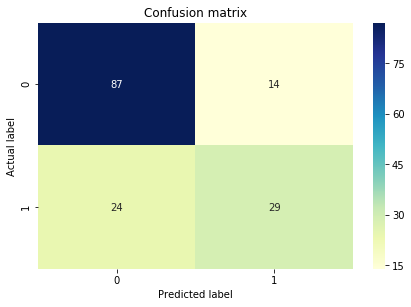

In [22]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

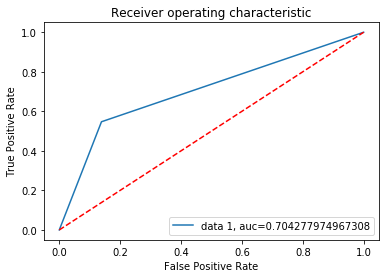

In [23]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
